In [16]:
import pandas as pd
import numpy as np

In [17]:
df1=pd.read_csv('visualize_results_cvpr/cifar10_0.5_sym.csv')
df2=pd.read_csv('visualize_results_cvpr/cifar100_0.5_asym.csv')
df3=pd.read_csv('visualize_results_cvpr/flower_0.5_sym.csv')
df4=pd.read_csv('visualize_results_cvpr/pet_0.5_asym.csv')

In [18]:
df5=pd.read_csv('visualize_results_cvpr/cifar10_0.25_sym.csv')
df6=pd.read_csv('visualize_results_cvpr/cifar100_0.25_asym.csv')
df7=pd.read_csv('visualize_results_cvpr/flower_0.25_sym.csv')
df8=pd.read_csv('visualize_results_cvpr/pet_0.25_asym.csv')

In [19]:
df9=pd.read_csv('visualize_results_cvpr/cifar10_0.75_sym.csv')
df10=pd.read_csv('visualize_results_cvpr/cifar100_0.75_asym.csv')
df11=pd.read_csv('visualize_results_cvpr/flower_0.75_sym.csv')
df12=pd.read_csv('visualize_results_cvpr/pet_0.75_asym.csv')

In [20]:
import matplotlib.pyplot as plt
set_basic_names = ['pretrain','inctrain'] 
set_LNL_names = ['Coteaching', 'Coteachingplus', 'Decoupling', 'DISC', 'ELR', 'GJS', 'JoCoR', 'NegativeLearning', 'PENCIL'] 
set_MU_names = [ 'FT', 'GA', 'GA_l1', 'wfisher'] 
set_OUR_names = ['CRUL']

# 生成配色方案 
set_basic_colors = plt.cm.Blues(np.linspace(0.3, 0.5, len(set_basic_names))) 
set_LNL_colors = plt.cm.Greens(np.linspace(0.3, 0.8, len(set_LNL_names))) 
set_MU_colors = plt.cm.Purples(np.linspace(0.3, 0.7, len(set_MU_names))) 
set_OUR_colors = plt.cm.Oranges(np.linspace(0.6, 0.6, len(set_MU_names))) 

# 创建字典 
uni_color_dict = {}
# 将颜色和 uni_name 配对 
for name, color in zip(set_basic_names, set_basic_colors): 
    uni_color_dict[name] = color 
for name, color in zip(set_LNL_names, set_LNL_colors): 
    uni_color_dict[name] = color 
for name, color in zip(set_MU_names, set_MU_colors): 
    uni_color_dict[name] = color 
for name, color in zip(set_OUR_names, set_OUR_colors): 
    uni_color_dict[name] = color

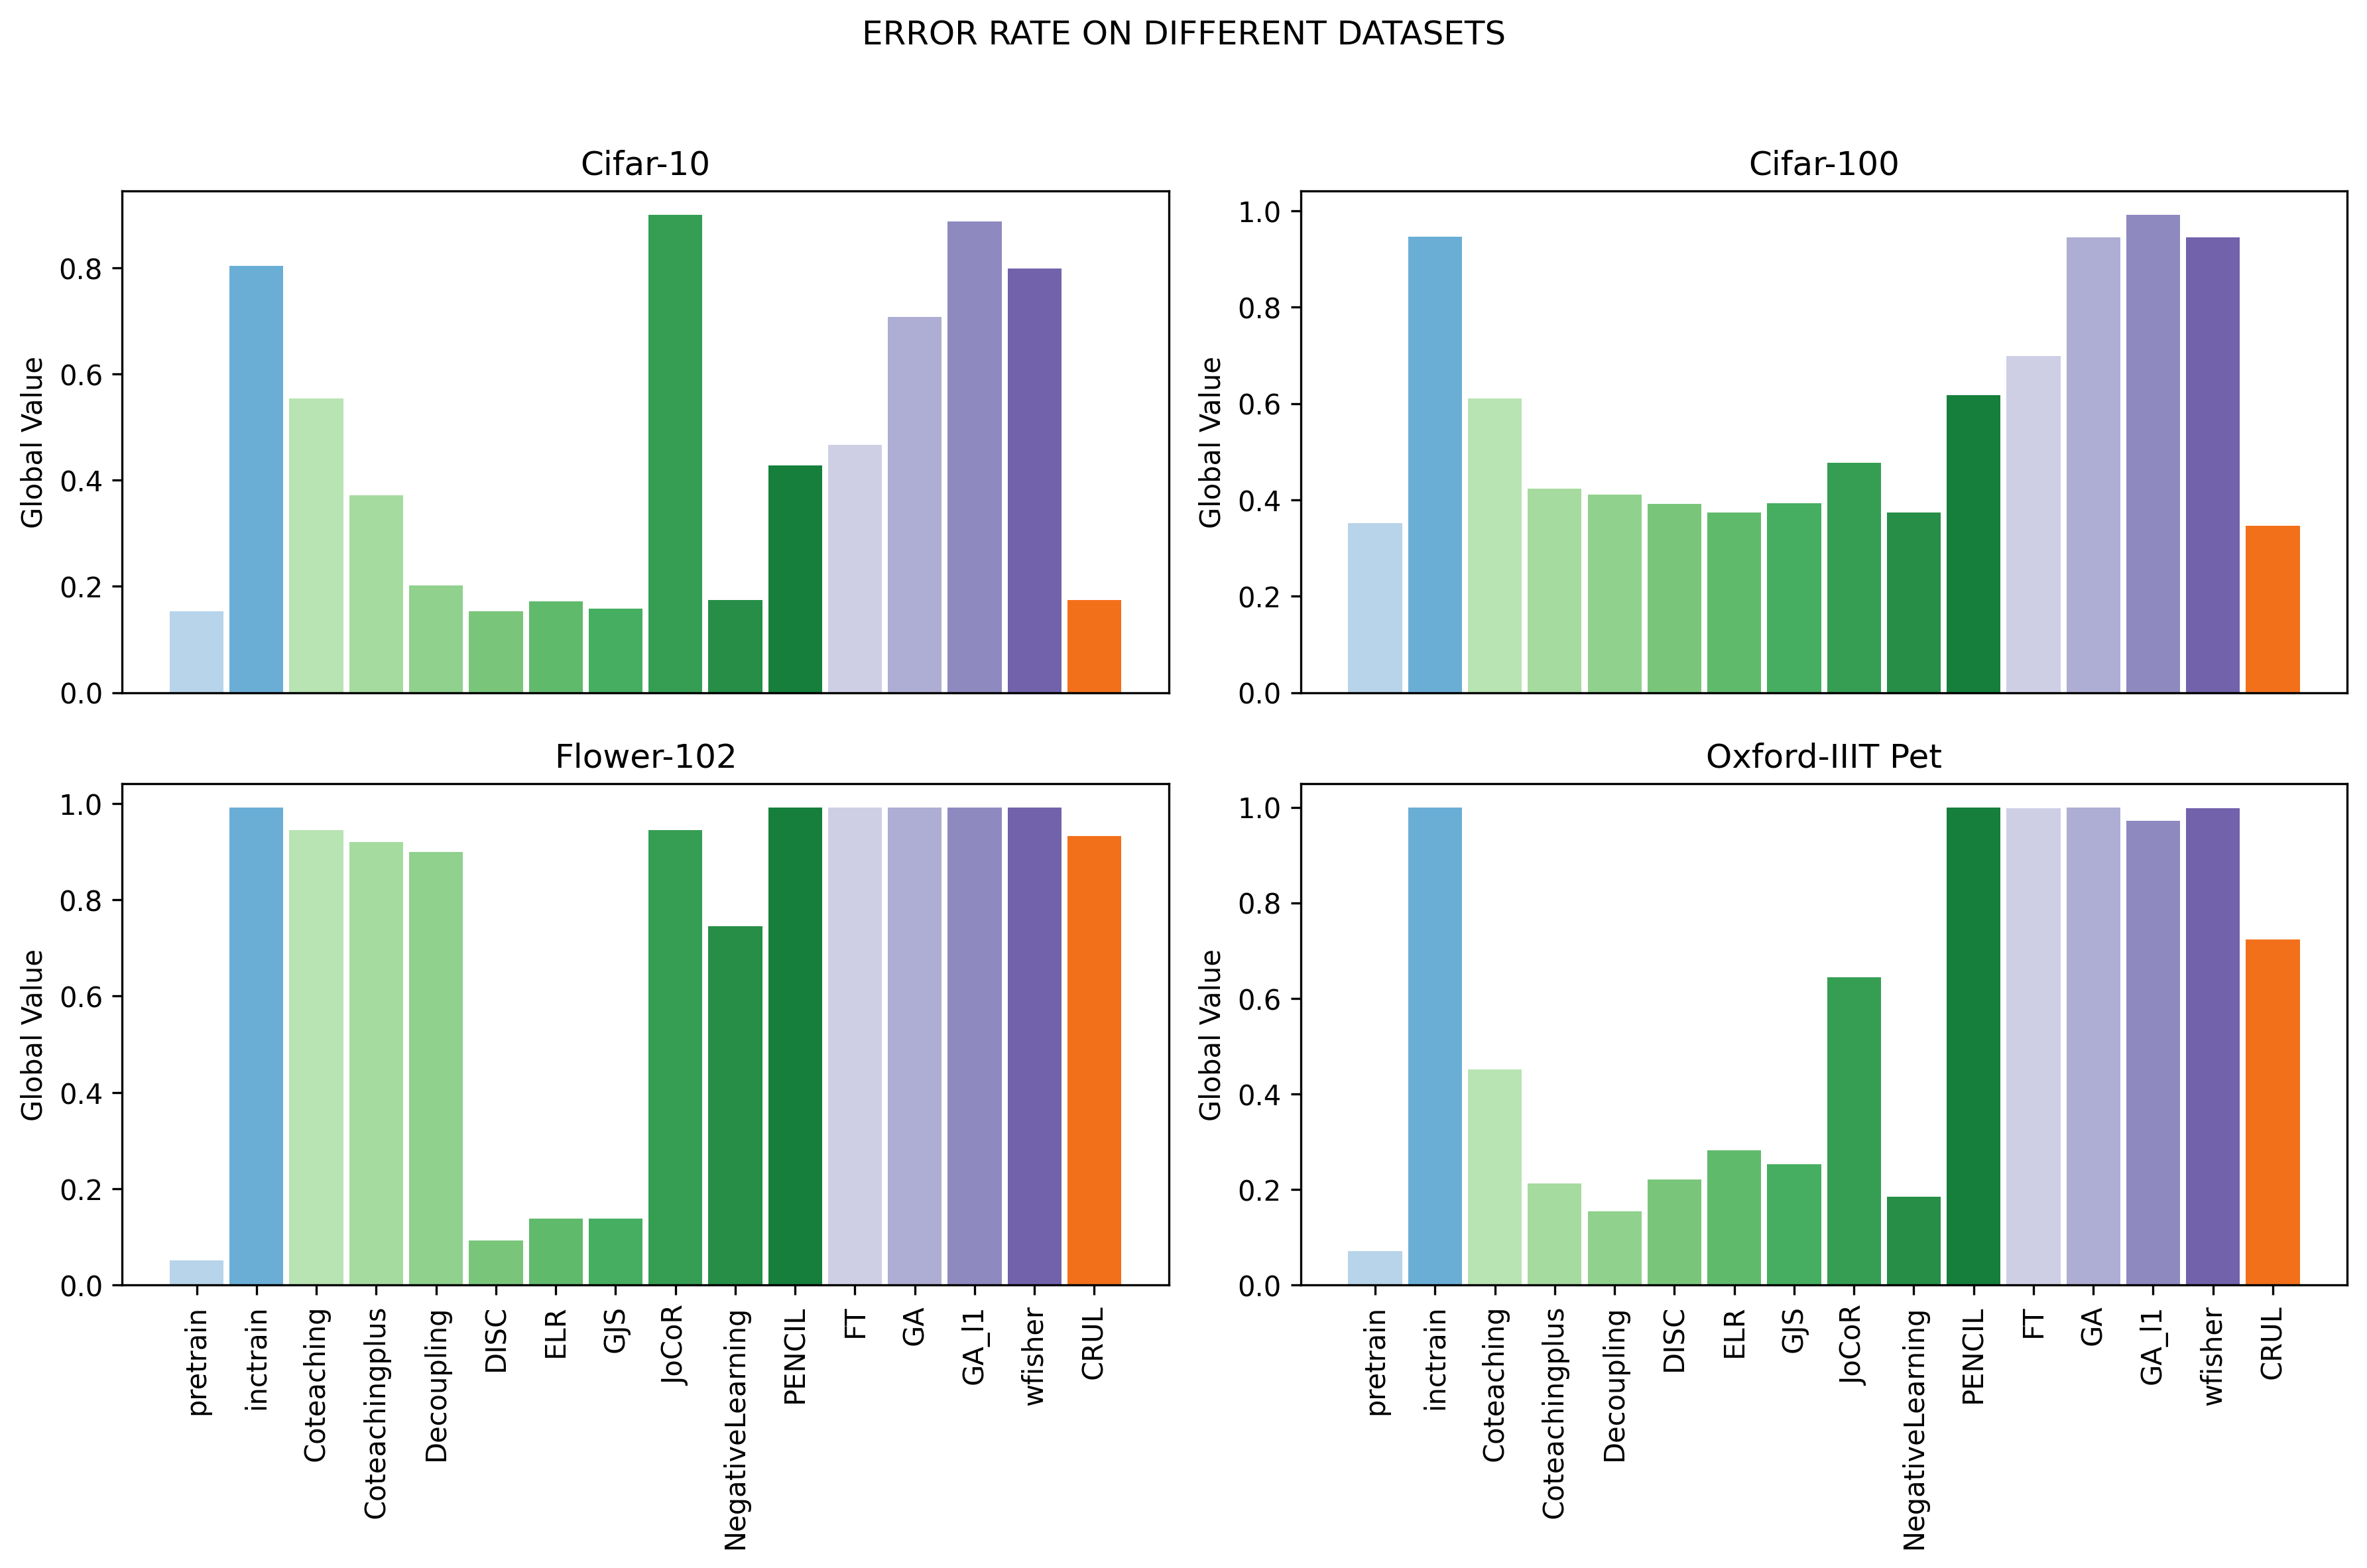

In [21]:
import matplotlib.pyplot as plt
dataframes = [df1,df2,df3,df4] 
labels = ['Cifar-10', 'Cifar-100', 'Flower-102', 'Oxford-IIIT Pet'] 
fig, axs = plt.subplots(2, 2, figsize=(12, 8)) 
plt.style.use("default")

for i, (df, label) in enumerate(zip(dataframes, labels)):
    ax = axs[i // 2, i % 2]
    for j, (method, global_val) in enumerate(zip(df['uni_name'], df['error_rate'])):
        ax.bar(method, global_val, color=uni_color_dict[method], label=method if i == 0 else "",width=0.9) 
    ax.set_title(f'{label}')
    # ax.set_xlabel('Algorithm') 
    ax.set_ylabel('Global Value')
    if i<=1:
        ax.set_xticks([])
    else:
        plt.setp(ax.get_xticklabels(), rotation=90)
    # ax.grid(True,linestyle='--',alpha=0.7)

handles, labels = [], [] 
for ax in axs.flat: 
    h, l = ax.get_legend_handles_labels() 
    handles.extend(h) 
    labels.extend(l) 

# n_cols = 4 # 图例列数 
# fig.legend(handles, labels, loc='upper center', ncol=n_cols, bbox_to_anchor=(0.5, -0.1), title="Methods")

#整体标题
fig.suptitle('ERROR RATE ON DIFFERENT DATASETS')

# 调整布局 
plt.tight_layout(rect=[0, 0, 1, 0.96])  
fig.set_dpi(300)
# 留出顶部空间给图例 
plt.show()


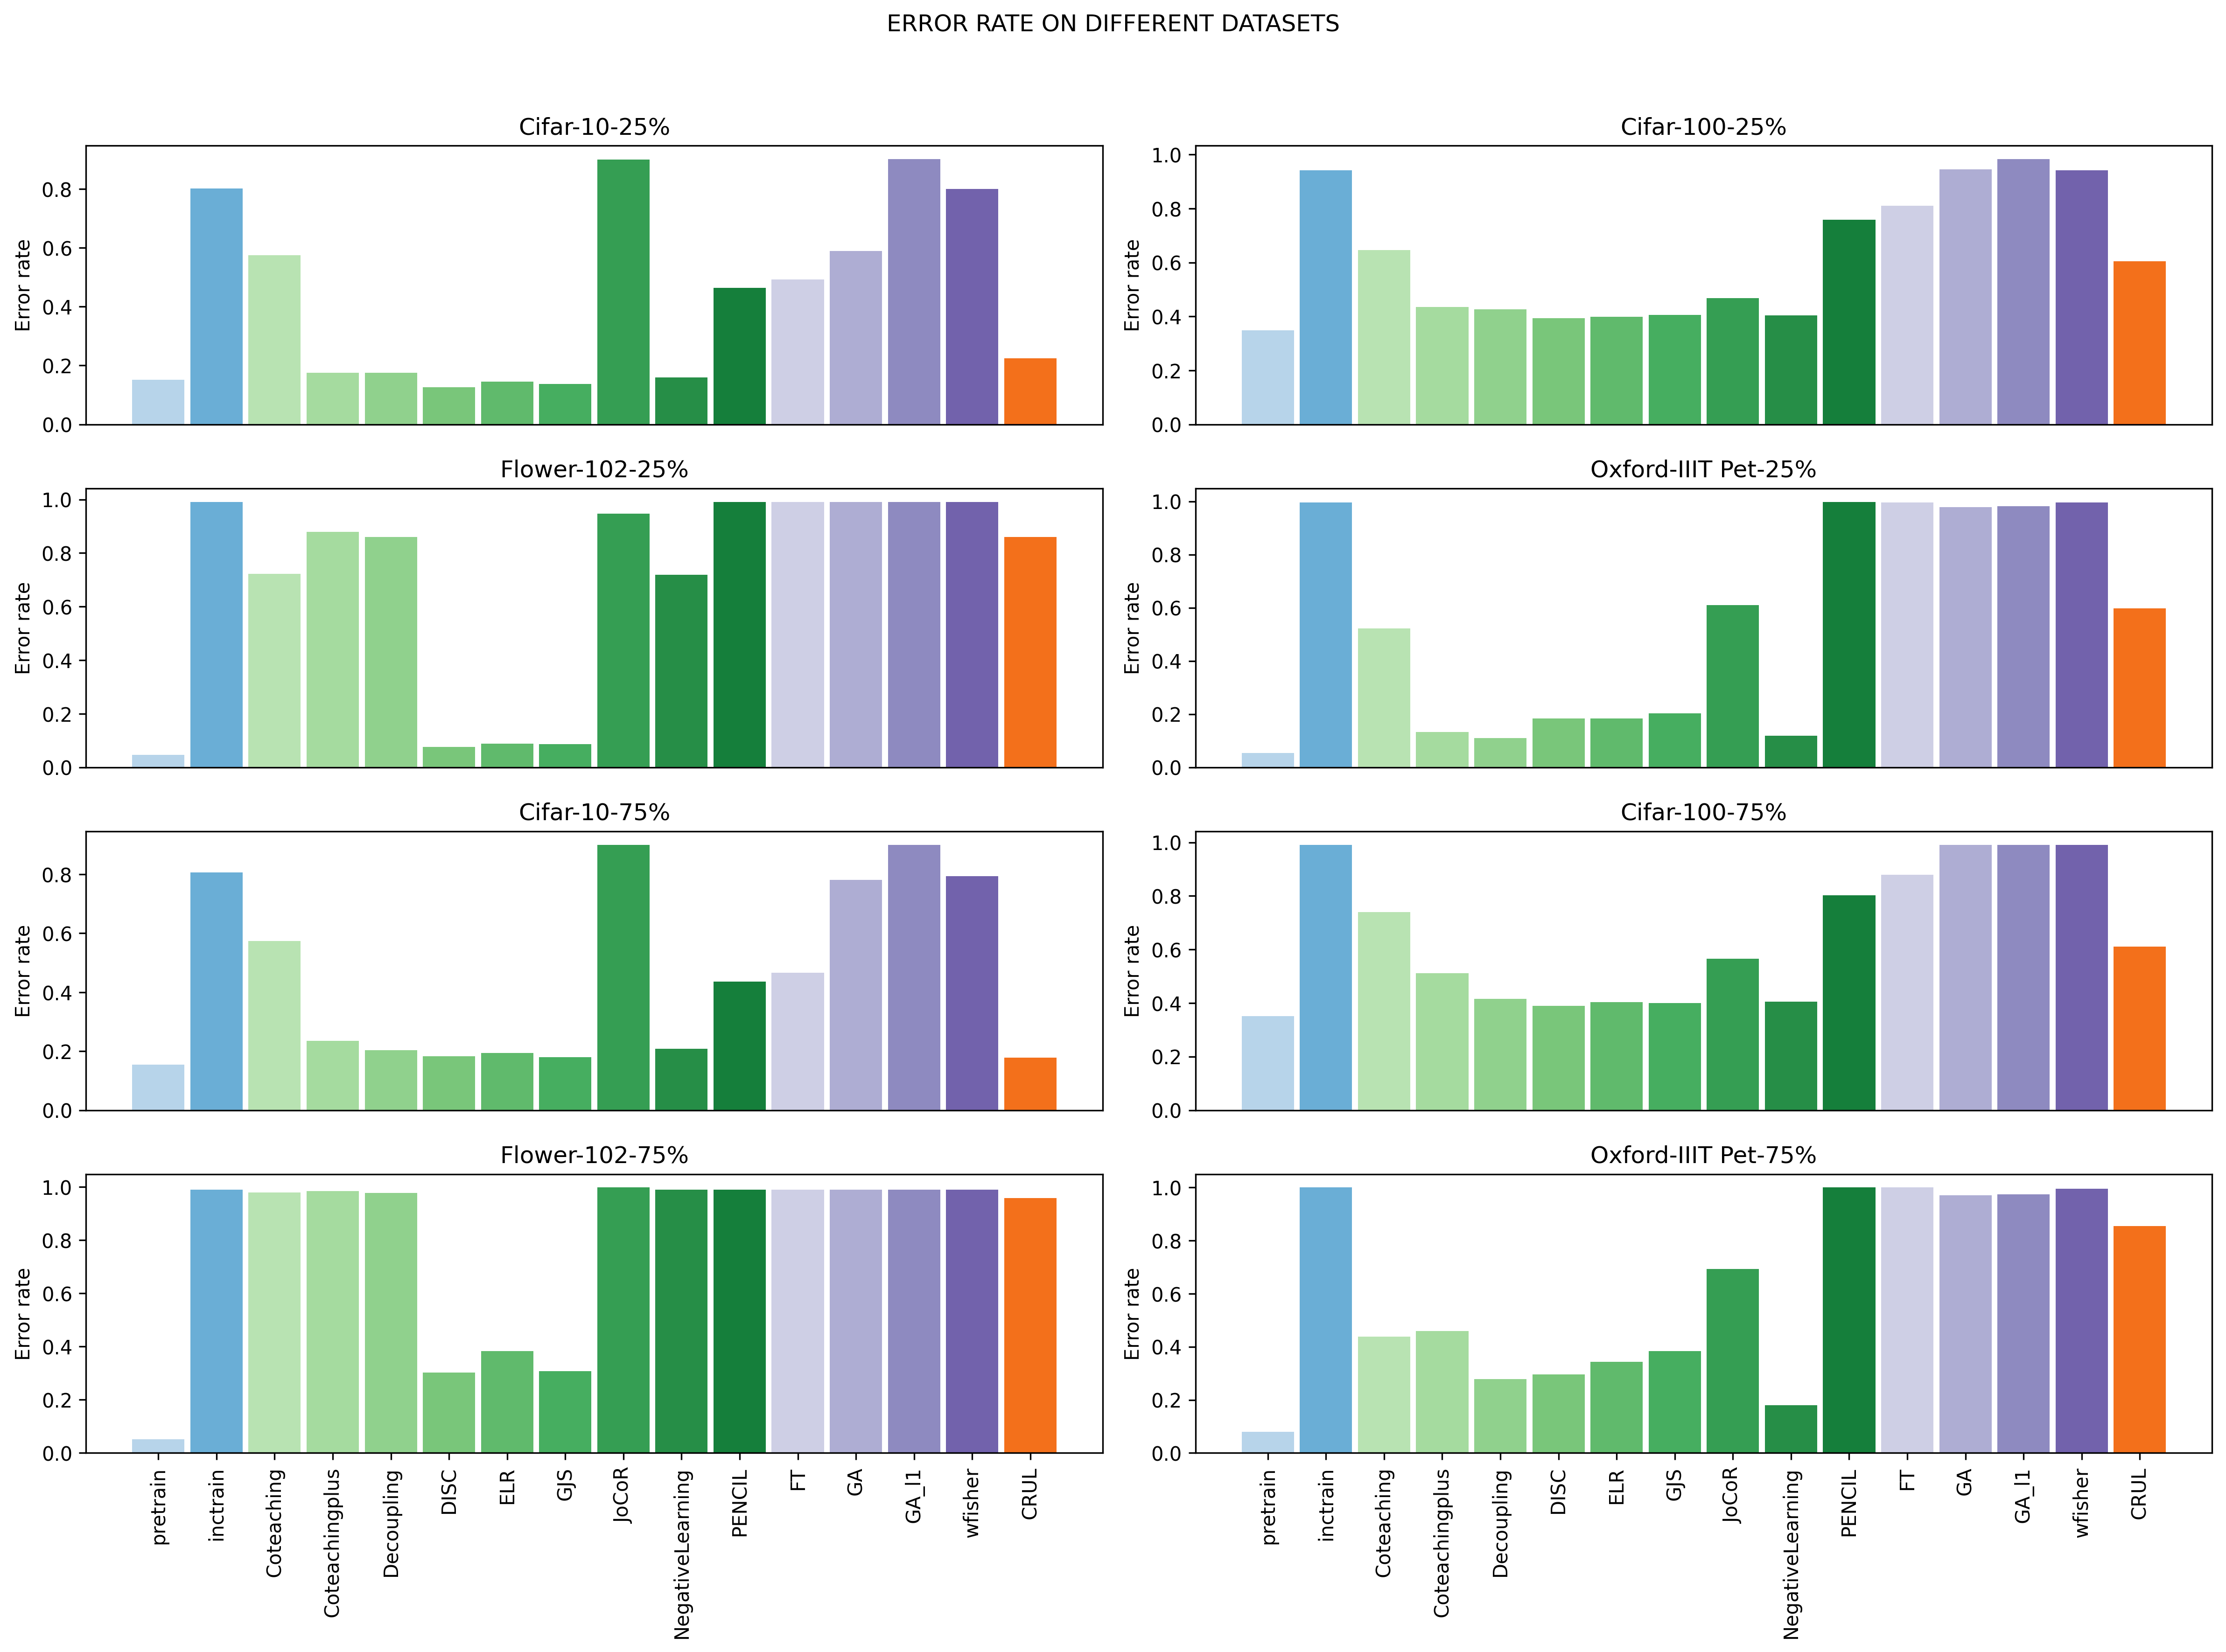

In [22]:
import matplotlib.pyplot as plt
dataframes = [df5,df6,df7,df8,df9,df10,df11,df12] 
labels = ['Cifar-10-25%', 'Cifar-100-25%', 'Flower-102-25%', 'Oxford-IIIT Pet-25%','Cifar-10-75%', 'Cifar-100-75%', 'Flower-102-75%', 'Oxford-IIIT Pet-75%'] 

fig, axs = plt.subplots(4, 2, figsize=(16, 12)) 

for i, (df, label) in enumerate(zip(dataframes, labels)):
    ax = axs[i // 2, i % 2]
    for j, (method, global_val) in enumerate(zip(df['uni_name'], df['error_rate'])):
        ax.bar(method, global_val, color=uni_color_dict[method], label=method if i == 0 else "",width=0.9) 
    ax.set_title(f'{label}')
    # ax.set_xlabel('Algorithm') 
    ax.set_ylabel('Error rate')
    if i<=5:
        ax.set_xticks([])
    else:
        plt.setp(ax.get_xticklabels(), rotation=90)
    # ax.grid(True,linestyle='--',alpha=0.7)

handles, labels = [], [] 
for ax in axs.flat: 
    h, l = ax.get_legend_handles_labels() 
    handles.extend(h) 
    labels.extend(l) 

# n_cols = 4 # 图例列数 
# fig.legend(handles, labels, loc='upper center', ncol=n_cols, bbox_to_anchor=(0.5,0), title="Methods")

#整体标题
fig.suptitle('ERROR RATE ON DIFFERENT DATASETS')

# 调整布局 
plt.tight_layout(rect=[0, 0, 1, 0.96])  
fig.set_dpi(300)
# 留出顶部空间给图例 
plt.show()


In [124]:
# # 设置雷达图的角度 
# labels = df1['uni_name'].astype(str).tolist() 
# num_vars = len(labels)
# angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() 
# # 将数据在图表上闭合 
# angles += angles[:1] 
# df1_values = df1['global'].tolist() + [df1['global'].tolist()[0]] 
# df5_values = df5['global'].tolist() + [df5['global'].tolist()[0]] 
# # 绘制雷达图 
# fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
# ax.fill(angles, df1_values, color='blue', alpha=0.25, label='50%') 
# ax.fill(angles, df5_values, color='red', alpha=0.25, label='25%') 
# # 设置标签 
# ax.set_xticks(angles[:-1]) 
# ax.set_xticklabels(labels)
# ax.set_yticklabels([]) 
# ax.set_title("Radar Chart for Accuracy  by Method") 
# ax.legend(loc="upper right", bbox_to_anchor=(1.1, 1.1)) 
# plt.show()

In [125]:
# dfs={'df1':df1,'df2':df2,'df3':df3,'df4':df4,'df5':df5,'df6':df6,'df7':df7,'df8':df8,'df9':df9,'df10':df10,'df11':df11,'df12':df12
# }
# subtitle=['Cifar-10','Cifar-100','Flower-102','Oxford-IIIT Pet']
# labels = dfs['df1']['uni_name'].astype(str).tolist() 
# num_vars = len(labels) 
# angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() 
# angles += angles[:1] 
# fig, axs = plt.subplots(2, 2, figsize=(14, 14), subplot_kw=dict(polar=True)) 
# fig.suptitle("Accuracy on noisy dataset", fontsize=16) 
# groups = [('df1', 'df5', 'df9'), ('df2', 'df6', 'df10'), ('df3', 'df7', 'df11'), ('df4', 'df8', 'df12')] 
# colors = [ 'green','blue','red'] 
# for i, group in enumerate(groups): 
#     ax = axs[i // 2, i % 2] 
    
#     for j, df_name in enumerate(group): 
#         values = dfs[df_name]['global'].tolist() + [dfs[df_name]['global'].tolist()[0]]
#         ax.fill(angles, values, color=colors[j], alpha=0.25, label=df_name)
#         ax.plot(angles, values, color=colors[j], linewidth=1, linestyle='solid')
#         ax.set_xticks(angles[:-1]) 
#         ax.set_xticklabels(labels) 
#         ax.set_yticklabels([]) 
#         ax.set_title(f"Dataset:{subtitle[i]}",fontsize=16,fontweight='bold') 
#         ax.legend(loc="upper right", bbox_to_anchor=(1.1, 1.1))
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# fig.set_dpi(300)
# plt.show()

In [126]:
# # cifar10 (25%), cifar10 (75%), cifar 100(25%), cifar 100 (75%), food (25%), food (75%), pet(25%), pet (75%)
# from math import pi


# # 8个数据集的名称，方便循环处理
# datasets = ["cifar10_25", "cifar10_75", "cifar100_25", "cifar100_75", "flower_25", "flower_75", "pet_25", "pet_75"]

# # 将所有DataFrame放入一个字典中
# dataframes = {
# "cifar10_25": df5,
# "cifar10_75": df9,
# "cifar100_25": df6,
# "cifar100_75": df10,
# "flower_25": df7,
# "flower_75": df11,
# "pet_25": df8,
# "pet_75": df12,
# }


# uni_names = df5["uni_name"].unique()

# # 创建单个雷达图的函数
# def plot_radar_chart(scores, uni_name):
#     num_vars = len(scores)

#     # 创建角度
#     angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

#     # 使雷达图闭合
#     scores += scores[:1]
#     angles += angles[:1]

#     # 绘制雷达图
#     fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))
#     ax.fill(angles, scores, color='b', alpha=0.25)
#     ax.plot(angles, scores, color='b', linewidth=2)
    
#     circle_values = [0.2, 0.4, 0.6, 0.8, 1.0]
#     ax.set_rgrids(circle_values, labels=[""] * len(circle_values)) # 隐藏默认的圈刻度标签

#     # 在图上标注每圈的分数
#     for value in circle_values:
#         ax.text(pi / 8, value, f"{value:.1f}", ha='center', color="grey") # pi / 8 控制标签位置

#     ax.set_title(f"Model: {uni_name}", size=14)
#     ax.set_yticklabels([])
#     ax.set_xticks(angles[:-1])
#     ax.set_xticklabels(datasets, size=10)
#     fig.set_dpi(300)

#     plt.show()

# for uni_name in uni_names:
#     scores = [dataframes[dataset].loc[dataframes[dataset]["uni_name"] == uni_name, "global"].values[0] for dataset in datasets]

#     plot_radar_chart(scores, uni_name)
    
    

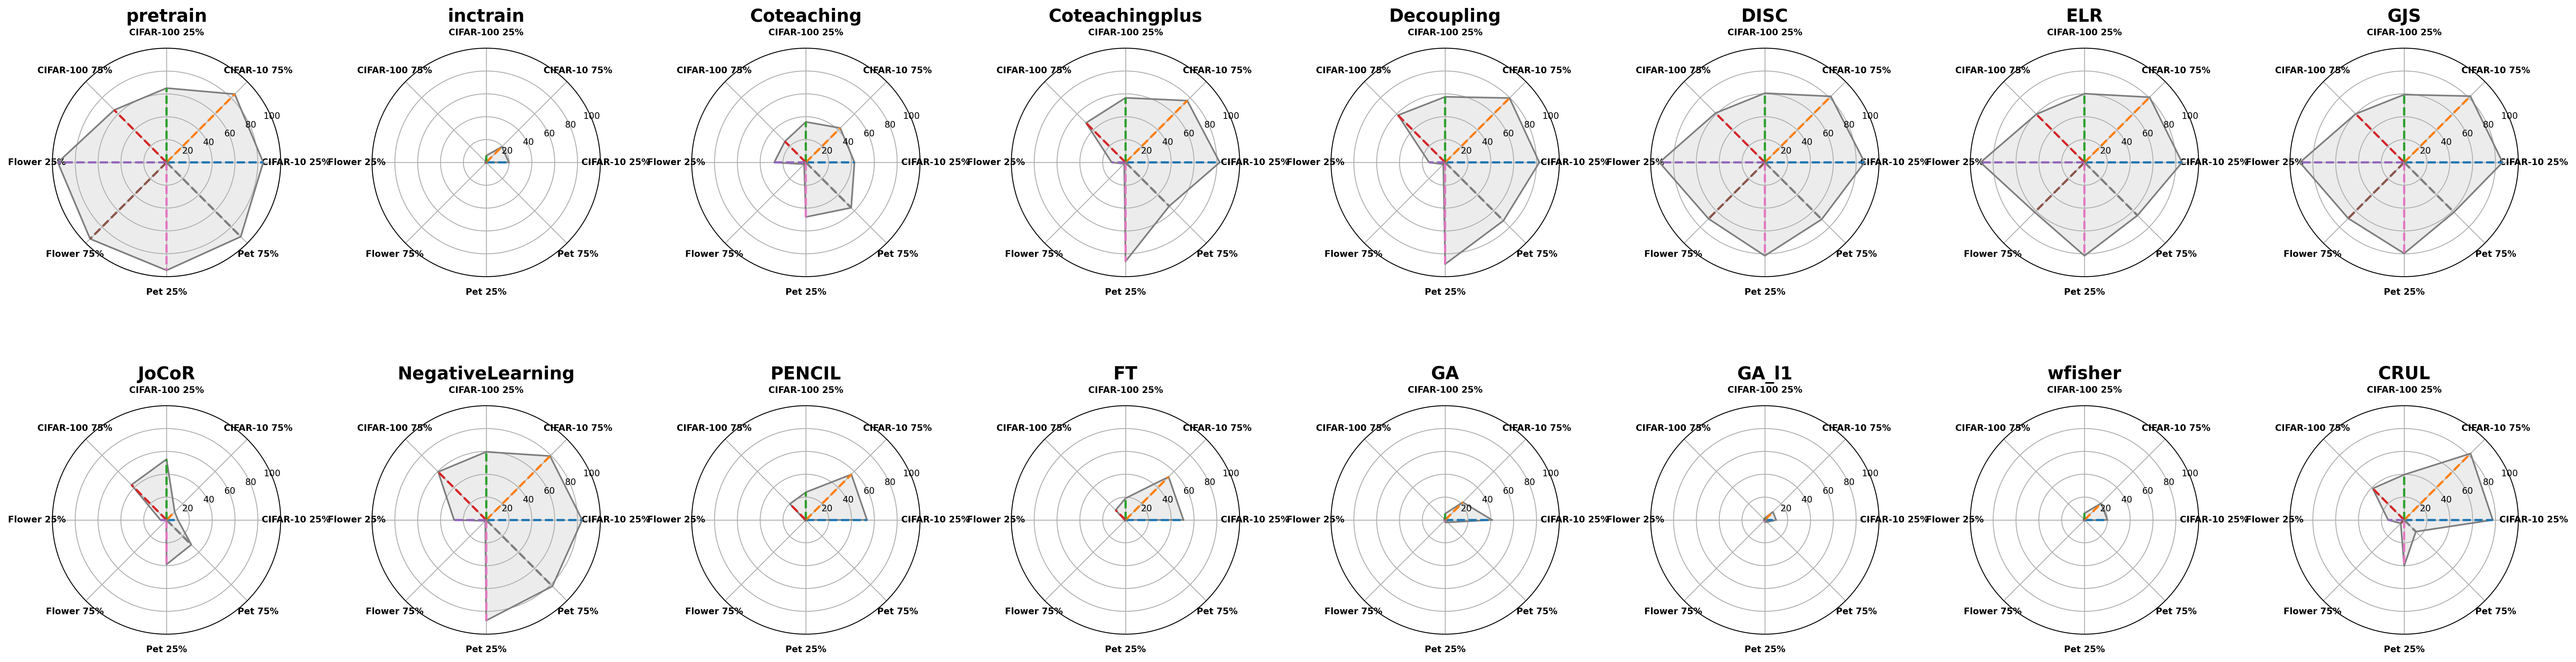

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Update dataset names for clarity
datasets = [
    "CIFAR-10 25%", "CIFAR-10 75%", "CIFAR-100 25%", "CIFAR-100 75%",
    "Flower 25%", "Flower 75%", "Pet 25%", "Pet 75%"
]

# Create a dictionary of dataframes with more meaningful keys
dataframes = {
    "CIFAR-10 25%": df5,
    "CIFAR-10 75%": df9,
    "CIFAR-100 25%": df6,
    "CIFAR-100 75%": df10,
    "Flower 25%": df7,
    "Flower 75%": df11,
    "Pet 25%": df8,
    "Pet 75%": df12,
}

# Get all unique uni_names
uni_names = df5["uni_name"].unique()
colors = plt.cm.tab10.colors

# Function to create radar charts with a 2-row layout
def plot_radar_charts(uni_names):
    num_plots = len(uni_names)
    num_cols = (num_plots + 1) // 2  # Calculate columns for a 2-row layout
    num_rows = 2  # Fix to two rows
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 10), subplot_kw=dict(polar=True))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for idx, ax in enumerate(axes.flatten()):
        if idx < num_plots:
            uni_name = uni_names[idx]

            # Retrieve the scores for the current uni_name
            scores = [
                dataframes[dataset].loc[dataframes[dataset]["uni_name"] == uni_name, "global"].values[0]
                for dataset in datasets
            ]

            # Close the radar chart by repeating the first score
            scores += scores[:1]
            angles = np.linspace(0, 2 * np.pi, len(scores) - 1, endpoint=False).tolist()
            angles += angles[:1]

            # Plot the radar chart
            ax.fill(angles, scores, color='grey', alpha=0.15)
            ax.plot(angles, scores, color='grey', linewidth=1.5)

            for i in range(len(datasets)):
                ax.plot([angles[i], angles[i]], [0, scores[i]], color=colors[i], linestyle='--', linewidth=2)

            # Set circular grid values and labels
            circle_values = [0.2, 0.4, 0.6, 0.8, 1.0]
            ax.set_rgrids(circle_values, labels=[""] * len(circle_values))
            for value in circle_values:
                ax.text(pi / 8, value, f"{int(value * 100)}", ha='center', color="black", fontsize=8)

            # Set title and axis labels
            ax.set_title(f"{uni_name}", size=16, weight='bold')
            ax.set_yticklabels([])
            ax.set_xticks(angles[:-1])
            ax.set_xticklabels(datasets, size=8, weight='bold')
        else:
            # Hide unused subplots
            ax.axis('off')

    fig.set_dpi(300)
    plt.show()

# Call the function to plot radar charts
plot_radar_charts(uni_names)
